# Final Project

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### Read Data

In [2]:
#read the dataset into a dataframe
df = pd.read_csv("dataset_phishing.csv")

### Exploratory Data Analysis

In [3]:
#first five rows
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


<BarContainer object of 2 artists>

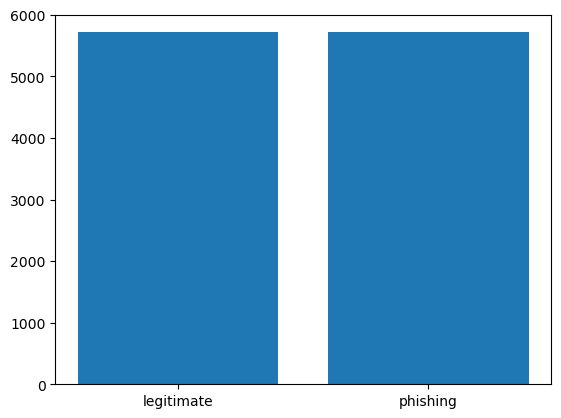

In [51]:
#y_label counts to check for dataset balance
plt.bar(df['status'].unique(), df['status'].value_counts())

In [5]:
#check for null vlaues
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [6]:
#descriptive statistics of dataset
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


### Data Preprocessing

In [7]:
#create X and y (drop url because dataset already contains all URL informaiton)
X = df.drop(['url','status'], axis = 1)
y = df['status']

In [8]:
#encode y values as 1's and 0's
y = y.replace({'phishing': 1, 'legitimate': 0})

/var/folders/l8/4ddk30qs673179tzbywg5n080000gn/T/ipykernel_17925/462398245.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'phishing': 1, 'legitimate': 0})


In [9]:
#split data into *0% training, 10% validation, and 10% test
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=.2, random_state=12)
X_valid, X_test, y_valid, y_test = train_test_split(X_tmp, y_tmp, test_size=.5, random_state=12)

In [10]:
#standardize the fetures
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Build Base Model--Logistic Regression

In [11]:
#instantiate model
log_reg = LogisticRegression(max_iter=1000, random_state=12)

In [12]:
#cross validation
log_reg_cv_scores = cross_val_score(log_reg, X_train, y_train, cv = 5)

In [13]:
print("Logistic Regression Cross-Validation Scores:", log_reg_cv_scores)
print("Average Cross-Validation Score:", log_reg_cv_scores.mean())

Logistic Regression Cross-Validation Scores: [0.9311099  0.94969929 0.95516676 0.94805905 0.94693654]
Average Cross-Validation Score: 0.9461943068936762


In [14]:
#train model and evaluate on test data 
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_valid)

In [15]:
print("Logistic Regression Performance on Validation Set:")
print(classification_report(y_valid, y_pred_log))
print(confusion_matrix(y_valid, y_pred_log))

Logistic Regression Performance on Validation Set:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       574
           1       0.95      0.94      0.94       569

    accuracy                           0.94      1143
   macro avg       0.94      0.94      0.94      1143
weighted avg       0.94      0.94      0.94      1143

[[544  30]
 [ 35 534]]


### Exploring other algorithm performances

#### Decision Trees

In [16]:
dt = DecisionTreeClassifier(random_state=12)
dt_cv_scores = cross_val_score(dt, X_train, y_train, cv=5)

In [17]:
# Print cross-validation scores and average accuracy
print("Decision Tree Cross-Validation Scores:", dt_cv_scores)
print("Average Cross-Validation Score:", dt_cv_scores.mean())

Decision Tree Cross-Validation Scores: [0.92673592 0.92618917 0.94040459 0.93603062 0.93435449]
Average Cross-Validation Score: 0.9327429583910088


In [18]:
# Train and evaluate Decision Tree on the test set
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_valid)

In [19]:
print("Decision Tree Performance on Test Set:")
print(classification_report(y_valid, y_pred_dt))
print(confusion_matrix(y_valid, y_pred_dt))

Decision Tree Performance on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       574
           1       0.94      0.92      0.93       569

    accuracy                           0.93      1143
   macro avg       0.93      0.93      0.93      1143
weighted avg       0.93      0.93      0.93      1143

[[540  34]
 [ 46 523]]


#### Random Forest

In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=12)
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5)

In [21]:
print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Average Cross-Validation Score:", rf_cv_scores.mean())

Random Forest Cross-Validation Scores: [0.95462001 0.96227447 0.97266266 0.96391471 0.96280088]
Average Cross-Validation Score: 0.9632545435620857


In [22]:
# Train and evaluate Random Forest on the test set
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_valid)

In [23]:
# Print Random Forest performance metrics
print("Random Forest Performance on Test Set:")
print(classification_report(y_valid, y_pred_rf))
print(confusion_matrix(y_valid, y_pred_rf))

Random Forest Performance on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       574
           1       0.98      0.96      0.97       569

    accuracy                           0.97      1143
   macro avg       0.97      0.97      0.97      1143
weighted avg       0.97      0.97      0.97      1143

[[560  14]
 [ 20 549]]


#### Support Vector Machine

In [24]:
svm = SVC(kernel = 'linear')
svm_cv_scores = cross_val_score(svm, X_train, y_train, cv=5)

In [25]:
# Print cross-validation scores and average accuracy
print("SVM Cross-Validation Scores:", svm_cv_scores)
print("Average Cross-Validation Score:", svm_cv_scores.mean())

SVM Cross-Validation Scores: [0.93165664 0.95133953 0.9557135  0.94696555 0.9463895 ]
Average Cross-Validation Score: 0.9464129458170276


In [26]:
# Train and evaluate SVM on the test set
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_valid)

In [27]:
# Print SVM performance metrics
print("SVM Performance on Test Set:")
print(classification_report(y_valid, y_pred_svm))
print(confusion_matrix(y_valid, y_pred_svm))

SVM Performance on Test Set:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       574
           1       0.95      0.93      0.94       569

    accuracy                           0.94      1143
   macro avg       0.94      0.94      0.94      1143
weighted avg       0.94      0.94      0.94      1143

[[545  29]
 [ 38 531]]


### Hyperparameter Tuning

In [28]:
#logistic regression grid search
param_grid_log_reg = {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear'],  
        'max_iter': [1000, 2000]
    }

log_reg = LogisticRegression(random_state=12)
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_log_reg.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", grid_search_log_reg.best_params_)
print("Best Cross-Validation Accuracy for Logistic Regression:", grid_search_log_reg.best_score_)

Best Parameters for Logistic Regression: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy for Logistic Regression: 0.9463035964457867


In [29]:
#decision tree grid search
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt']
}

dt = DecisionTreeClassifier(random_state=12)
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Cross-Validation Accuracy for Decison Tree:", grid_search_dt.best_score_)

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Cross-Validation Accuracy for Decison Tree: 0.9376641586499062


In [30]:
#random forest grid search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

rf = RandomForestClassifier(random_state=12)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy for Random Forest:", grid_search_rf.best_score_)

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Accuracy for Random Forest: 0.9642388075415174


In [31]:
#SVM grid search
param_grid_svm = {
    'C': [0.1, 1, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

svm = SVC(random_state=12)
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best Cross-Validation Accuracy for SVM:", grid_search_svm.best_score_)

Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy for SVM: 0.9562559445261307


### Model Evaluations

In [32]:
#generate predictions on test data using each model
y_pred_log = grid_search_log_reg.predict(X_test)
y_pred_dt = grid_search_dt.predict(X_test)
y_pred_rf = grid_search_rf.predict(X_test)
y_pred_svm = grid_search_svm.predict(X_test)

In [33]:
#make table summarizing each models performance metrics
model_results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "SVM"],
    "Best Parameters from Grid Search": [
    grid_search_log_reg.best_params_,
    grid_search_dt.best_params_,
    grid_search_rf.best_params_,
    grid_search_svm.best_params_
    ],
    "Avg. Cross-Validation Score": [
        grid_search_log_reg.best_score_,
        grid_search_dt.best_score_, 
        grid_search_rf.best_score_, 
        grid_search_svm.best_score_,
    ],
    "Test Accuracy": [
        grid_search_log_reg.score(X_test, y_test),
        grid_search_dt.score(X_test, y_test),
        grid_search_rf.score(X_test, y_test),
        grid_search_svm.score(X_test, y_test)

    ],
    "Precision": [
        classification_report(y_test, y_pred_log, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_svm, output_dict=True)['1']['precision']

    ],
    "Recall": [
        classification_report(y_test, y_pred_log, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_svm, output_dict=True)['1']['recall']
    ],
    "F1-Score": [
        classification_report(y_test, y_pred_log, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_svm, output_dict=True)['1']['f1-score'],
    ]
}

pd.set_option('display.max_colwidth', None)
results_df = pd.DataFrame(model_results)
results_df

,Model,Best Parameters from Grid Search,Avg. Cross-Validation Score,Test Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,"{'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}",0.946304,0.950131,0.952043,0.946996,0.949513
1,Decision Tree,"{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}",0.937664,0.934383,0.943942,0.922261,0.932976
2,Random Forest,"{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}",0.964239,0.970254,0.976703,0.962898,0.969751
3,SVM,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.956256,0.956255,0.969091,0.941696,0.955197


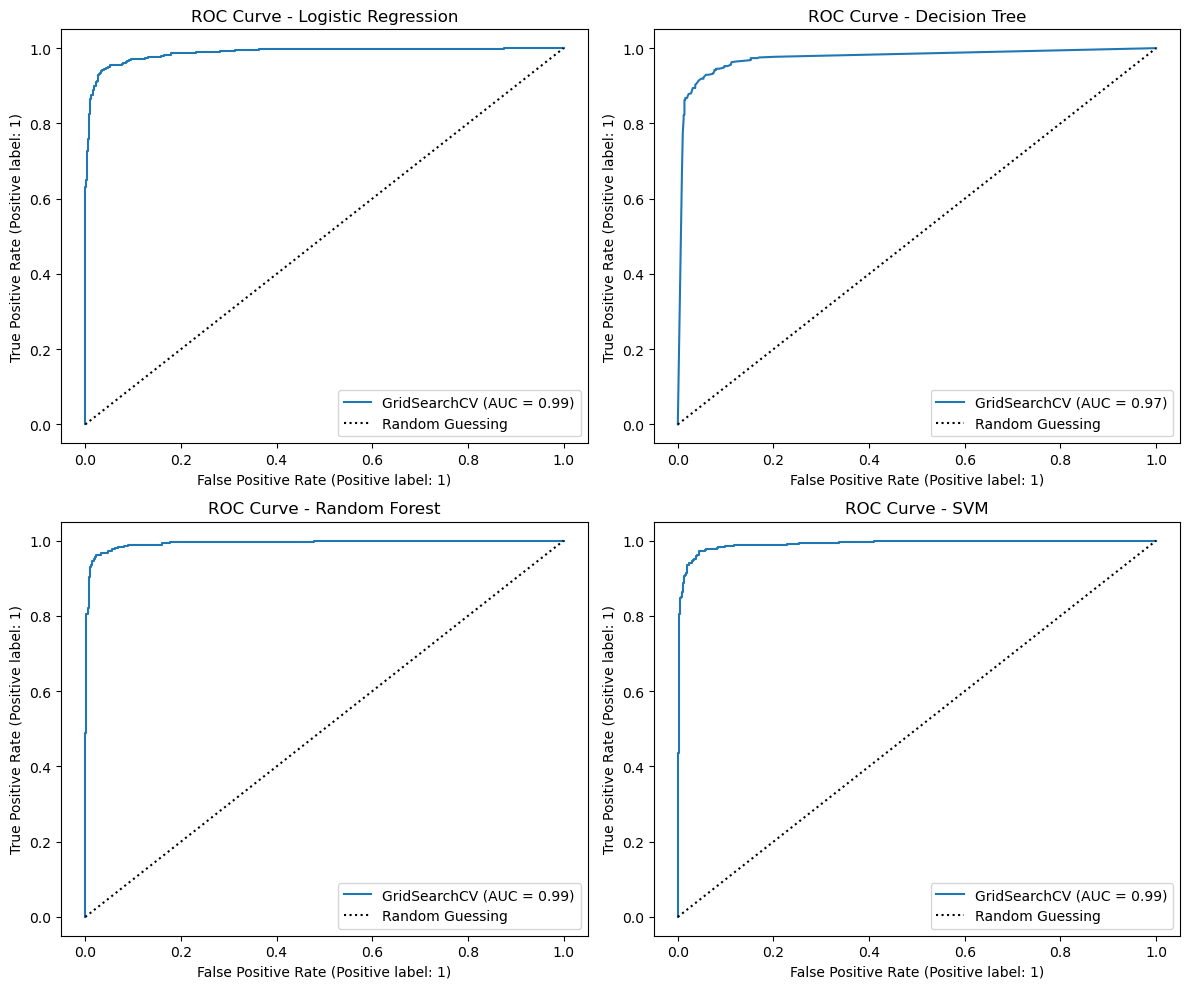

In [34]:
#ROC curves for each model
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten() 

models = [grid_search_log_reg, grid_search_dt, grid_search_rf, grid_search_svm]  
labels = ['Logistic Regression', 'Decision Tree','Random Forest', 'SVM']  

for i, model in enumerate(models):
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=axes[i])
    axes[i].plot([0, 1], [0, 1], ':k', label='Random Guessing')  
    axes[i].set_title(f"ROC Curve - {labels[i]}")  
    axes[i].legend()  

plt.tight_layout()
plt.show()

## Best Model: Random Forest 

In [35]:
#assign best model
best_model = grid_search_rf.best_estimator_

### Model Interpretations

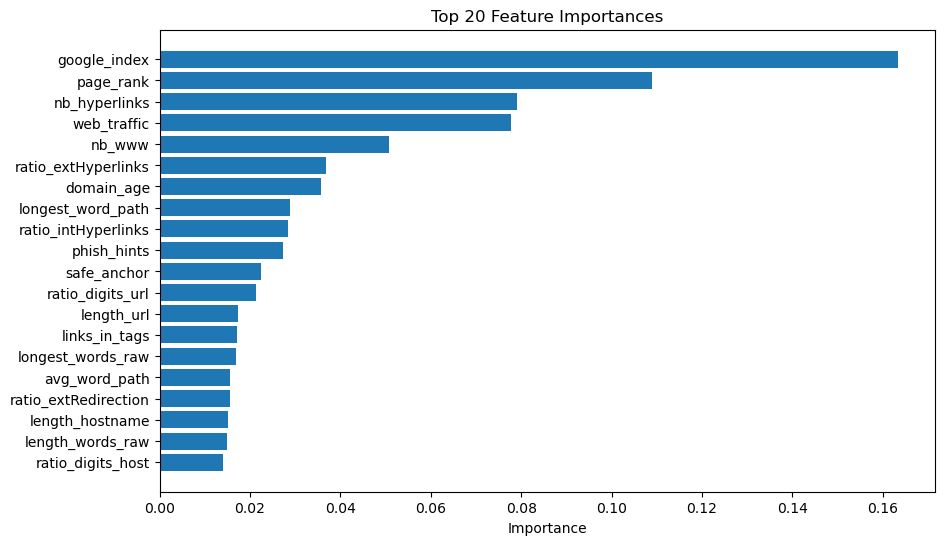

In [37]:
#feature importances for top 20 features
model_importances = best_model.feature_importances_
feature_names = X.columns  

rf_feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': model_importances
})
top_n = 20
rf_feature_importances = rf_feature_importances.sort_values(by='Importance', ascending=False).head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importances['Feature'], rf_feature_importances['Importance'])
plt.xlabel('Importance')
plt.title(f'Top {top_n} Feature Importances')
plt.gca().invert_yaxis()  
plt.show()

Google index: Binary variable representing if the URL has a google index which google uses to index websites it knows about.</br>
Page rank: Metric used by google representing web page importance. Values range from 0-10 with 10 being most important.</br>
Number of hyperlinks: Number of hyperlinks on the page.</br>
Web traffic: Amount of web traffic the web page has.

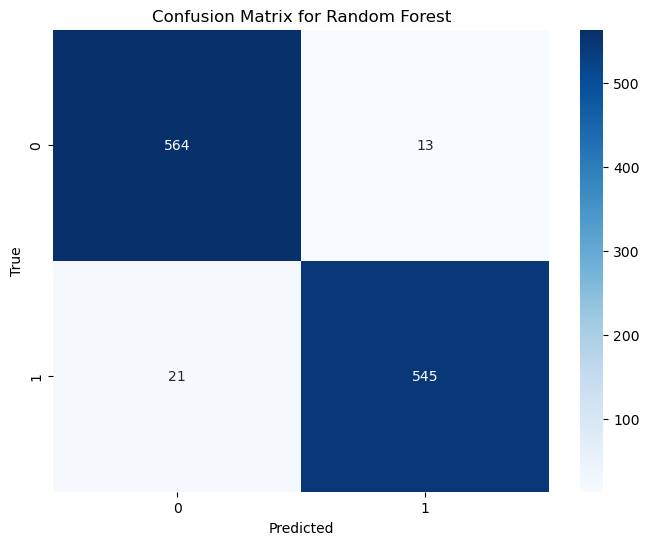

In [38]:
#confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

plot_confusion_matrix("Random Forest", y_test, y_pred_rf)

Out of the test set, 545 of the phishing scams were correctly identified as phishing. 564 of the legitimate URLs were correctly labeled as legitimate. 21 of the true phishing scams were incorrectly labeled as legitimate and 13 legitimate URLs were incorrectly labeled as phishing scams.